PPR-20KD12

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('test.csv', encoding= 'unicode_escape')

In [3]:
from numpy import unique
from numpy import argmax
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense

from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

Czyszczenie i edycja bazy

In [4]:
duplicated_rows= data[data.duplicated()]
#print(duplicated_rows)

In [5]:
data = data.drop_duplicates() #


In [6]:
import numpy as np
cols_to_drop = ['SIGMA-LI']
data = data.drop(cols_to_drop, axis=1)

In [7]:
data2 = data.iloc[: , :-1]

In [8]:
data2['Sys'] = pd.to_datetime(data2['Sys'])
df2 = data2.groupby(data2['Sys'].dt.to_period('w')).sum()

In [9]:
df2 = df2.reset_index()
df2['Sys'] = df2['Sys'].apply(lambda x: x.strftime('%Y-%m-%w'))
df2.set_index('Sys', inplace=True)

In [10]:
df2.to_csv('kd12.csv')

PPR-20KD12: Wykres wielkości/ilości cechy1 i cecy 2

PPR-20KD12: Cecha

In [12]:
series = read_csv('kd12.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
#series = series.iloc[: , 1]

In [11]:
from datetime import datetime
def parser(x):
	return datetime.strptime(x,'%Y-%m-%w')

In [13]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

c:\Users\windy\anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [14]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(df2, lag=1):
	df = DataFrame(df2)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

In [15]:
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

In [16]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

In [17]:
# scale train and test data to [-1, 1]
def scale(train, test):
	# fit scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)
	# transform train
	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)
	# transform test
	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

In [18]:
# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
	new_row = [x for x in X] + [value]
	array = numpy.array(new_row)
	array = array.reshape(1, len(array))
	inverted = scaler.inverse_transform(array)
	return inverted[0, -1]

In [19]:
# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(nb_epoch):
		model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
		model.reset_states()
	return model

In [20]:
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

In [21]:
# transform data to be stationary
raw_values = series.values
diff_values = difference(raw_values, 1)

In [22]:
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

In [23]:
# split data into train and test-sets
train, test = supervised_values[0:-52], supervised_values[-52:]

In [24]:
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

In [38]:
# fit the model
#lstm_model = fit_lstm(train_scaled, 1, 812, 1)

In [25]:
# forecast the entire training dataset to build up state for forecasting
#train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
#lstm_model.predict(train_reshaped, batch_size=1)

array([[-1.11456767e-01],
       [-4.20698524e-03],
       [ 5.88109642e-02],
       [ 2.70613879e-02],
       [ 1.44298971e-02],
       [-6.80753589e-03],
       [-7.28568733e-02],
       [-8.38742554e-02],
       [ 3.11546773e-02],
       [ 1.49710625e-02],
       [-1.90418214e-02],
       [-3.38456035e-02],
       [-6.83885366e-02],
       [ 3.68191302e-03],
       [-1.93958610e-01],
       [ 4.63578254e-02],
       [-5.34149557e-02],
       [-1.74895525e-02],
       [ 1.08147860e-02],
       [-1.06203020e-01],
       [-1.82199240e-01],
       [ 6.27339035e-02],
       [ 6.66749328e-02],
       [ 8.55953991e-03],
       [-4.73924726e-02],
       [-4.43581343e-02],
       [ 1.30221099e-02],
       [-1.68619722e-01],
       [ 2.98619121e-02],
       [-1.41194165e-02],
       [ 1.38362944e-02],
       [ 1.49533153e-03],
       [-6.08600527e-02],
       [-7.29846954e-02],
       [ 3.05132419e-02],
       [ 1.56400055e-02],
       [-6.43574744e-02],
       [ 8.36479664e-03],
       [-5.6

In [25]:
# repeat experiment
repeats = 40
error_scores = list()
for r in range(repeats):
	# fit the model
	lstm_model = fit_lstm(train_scaled, 1, 812, 1)
	# forecast the entire training dataset to build up state for forecasting
	train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
	lstm_model.predict(train_reshaped, batch_size=1)
	# walk-forward validation on the test data
	predictions = list()
	for i in range(len(test_scaled)):
		# make one-step forecast
		X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
		yhat = forecast_lstm(lstm_model, 1, X)
		# invert scaling
		yhat = invert_scale(scaler, X, yhat)
		# invert differencing
		yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
		# store forecast
		predictions.append(yhat)
	# report performance
	rmse = sqrt(mean_squared_error(raw_values[-52:], predictions))
	print('%d) Test RMSE: %.3f' % (r+1, rmse))
	error_scores.append(rmse)

1) Test RMSE: 74.975
2) Test RMSE: 74.851
3) Test RMSE: 73.920
4) Test RMSE: 74.186
5) Test RMSE: 73.810
6) Test RMSE: 73.416
7) Test RMSE: 73.902
8) Test RMSE: 74.958
9) Test RMSE: 73.784
10) Test RMSE: 74.043
11) Test RMSE: 73.661
12) Test RMSE: 73.616
13) Test RMSE: 73.344
14) Test RMSE: 74.039
15) Test RMSE: 74.196
16) Test RMSE: 75.071
17) Test RMSE: 73.995
18) Test RMSE: 74.021
19) Test RMSE: 73.523
20) Test RMSE: 74.139
21) Test RMSE: 74.156
22) Test RMSE: 74.197
23) Test RMSE: 74.725
24) Test RMSE: 73.840
25) Test RMSE: 73.710
26) Test RMSE: 73.795
27) Test RMSE: 74.028
28) Test RMSE: 74.812
29) Test RMSE: 73.653
30) Test RMSE: 73.490
31) Test RMSE: 73.880
32) Test RMSE: 74.726
33) Test RMSE: 73.771
34) Test RMSE: 75.348
35) Test RMSE: 73.689
36) Test RMSE: 74.994
37) Test RMSE: 73.766
38) Test RMSE: 74.283
39) Test RMSE: 74.886
40) Test RMSE: 74.661


            rmse
count  40.000000
mean   74.146490
std     0.530418
min    73.344315
25%    73.769270
50%    74.024576
75%    74.676997
max    75.348145


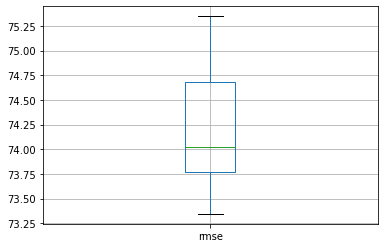

In [26]:
#summarize results
results = DataFrame()
results['rmse'] = error_scores
print(results.describe())
results.boxplot()
pyplot.show()

In [27]:
# report performance
rmse = sqrt(mean_squared_error(raw_values[-52:], predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 74.661


In [28]:
# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)
	# invert differencing
	yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Week=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

Week=1, Predicted=22.019396, Expected=71.000000
Week=2, Predicted=36.797530, Expected=111.000000
Week=3, Predicted=68.641888, Expected=6.000000
Week=4, Predicted=72.116818, Expected=52.000000
Week=5, Predicted=45.022748, Expected=46.000000
Week=6, Predicted=50.433088, Expected=30.000000
Week=7, Predicted=47.633940, Expected=50.000000
Week=8, Predicted=44.527302, Expected=40.000000
Week=9, Predicted=49.037533, Expected=55.000000
Week=10, Predicted=50.379320, Expected=90.000000
Week=11, Predicted=63.632879, Expected=106.000000
Week=12, Predicted=86.820581, Expected=2.000000
Week=13, Predicted=74.576979, Expected=10.000000
Week=14, Predicted=33.992723, Expected=10.000000
Week=15, Predicted=21.214852, Expected=100.000000
Week=16, Predicted=33.016927, Expected=100.000000
Week=17, Predicted=77.185376, Expected=2.000000
Week=18, Predicted=70.171466, Expected=10.000000
Week=19, Predicted=32.550962, Expected=20.000000
Week=20, Predicted=23.065176, Expected=30.000000
Week=21, Predicted=26.467285

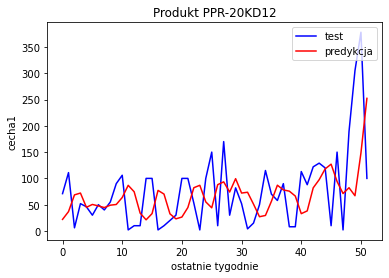

In [29]:
# line plot of observed vs predicted, last ... m
pyplot.plot(raw_values[-52:], color='blue', label='test')
pyplot.plot(predictions, color='red', label='predykcja')
pyplot.xlabel('ostatnie tygodnie')
pyplot.ylabel('cecha1')
pyplot.title('Produkt PPR-20KD12')
pyplot.legend(loc='upper right')
pyplot.show()

b=raw_values[-52:]

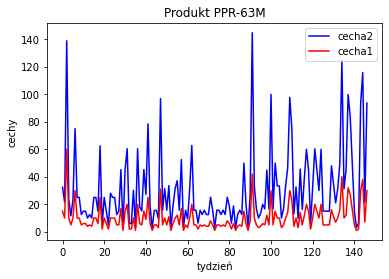

In [71]:
import matplotlib.pyplot as plt
import pandas as pd
numpy_arraydf2 = df2.to_numpy()
numpy_arraydf3 = df3.to_numpy()
plt.plot(numpy_arraydf3, color='blue', label='cecha2')
plt.plot(numpy_arraydf2, color='red', label='cecha1')

plt.xlabel('tydzień')
plt.ylabel('cechy')
plt.title('Produkt PPR-R20PN20')
plt.legend(loc='upper right')
plt.show()

PPR-20KD12: cecha2

In [48]:
by = data[data.columns[-1:]]

In [49]:
tesdf = data2.iloc[: , :-1]

In [50]:
tesdf['cecha2'] = by

In [51]:
tesdf['Sys'] = pd.to_datetime(tesdf['Sys'])
df3 = tesdf.groupby(tesdf['Sys'].dt.to_period('w')).sum()

In [52]:
df3 = df3.reset_index()
df3['Sys'] = df3['Sys'].apply(lambda x: x.strftime('%Y-%m-%w'))
df3.set_index('Sys', inplace=True)

In [53]:
df3.to_csv('R20PN20cech2.csv')

In [54]:
series = read_csv('R20PN20cech2.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
#series = series.iloc[: , 1]

Porównanie dwóch cech w tygodniach

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.plot(by, color='red', label='cecha1')
#plt.plot(cech263K, color='blue', label='cecha2')
plt.xlabel('miesiące')
plt.ylabel('cechy')
plt.title('Produkt PPR-63K45')
plt.legend(loc='upper right')
plt.show()

Produkt PPR-63K45

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('PPR-63K45.csv', encoding= 'unicode_escape')

In [2]:
duplicated_rows= data[data.duplicated()]
#print(duplicated_rows)

In [3]:
data = data.drop_duplicates() #

In [4]:
import numpy as np
cols_to_drop = ['SIGMA-LI']
data = data.drop(cols_to_drop, axis=1)

In [5]:
data2 = data.iloc[: , :-1]

In [7]:
data2['Sys'] = pd.to_datetime(data2['Sys'])
df2 = data2.groupby(data2['Sys'].dt.to_period('w')).sum()

In [8]:
df2 = df2.reset_index()
df2['Sys'] = df2['Sys'].apply(lambda x: x.strftime('%Y-%m-%w'))
df2.set_index('Sys', inplace=True)

In [12]:
df2.to_csv('63K45.csv')

In [16]:
series = read_csv('63K45.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
#series = series.iloc[: , 1]

In [ ]:
# line plot of observed vs predicted, last ... m
pyplot.plot(raw_values[-52:], color='blue', label='test')
pyplot.plot(predictions, color='red', label='predykcja')
pyplot.xlabel('ostatnie tygodnie')
pyplot.ylabel('cecha1')
pyplot.title('Produkt PPR-63K45')
pyplot.legend(loc='upper right')
pyplot.show()

b=raw_values[-52:]

PPR-63K45: Wykres wielkości/ilości cechy1 i cecy 2

PPR-63K45: Cecha 2

PPR-63K45: cecha1

PPR-25K